# <center> Boruta Algorithm </center>

__Packages to install:__

1. pip install Boruta or conda install -c conda-forge boruta_py
2. pip install scikit-learn

__Resources__

1. Data Sets used in R: http://www.principlesofeconometrics.com/poe4/poe4excel.htm

2. RandomForestRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

3. BroutaPy: https://github.com/scikit-learn-contrib/boruta_py

4. Time Series Cross Validation Methods: https://towardsdatascience.com/dont-use-k-fold-validation-for-time-series-forecasting-30b724aaea64

In [3]:
# pip install BorutaShap
from BorutaShap import BorutaShap
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestRegressor

In [2]:
# pip install BorutaShap
# pip install ipywidgets
# if ipywidget error occurs:
    # try: jupyter nbextension enable --py widgetsnbextension (for non-virutal enviornment)
    # try: jupyter nbextension enable --py widgetsnbextension --sys-prefix (for virtual enviornment)

__BorutaShap documentation:__ https://github.com/Ekeany/Boruta-Shap

In [3]:
df = pd.read_csv('cps4_small.csv')
# check for null values 
df.isnull().values.any()
df.head(5)

x = df.iloc[:, 1:]
y = df['wage']


4 attributes confirmed important: ['exper', 'educ', 'hrswk', 'female']
7 attributes confirmed unimportant: ['midwest', 'south', 'black', 'asian', 'west', 'married', 'metro']
0 tentative attributes remains: []


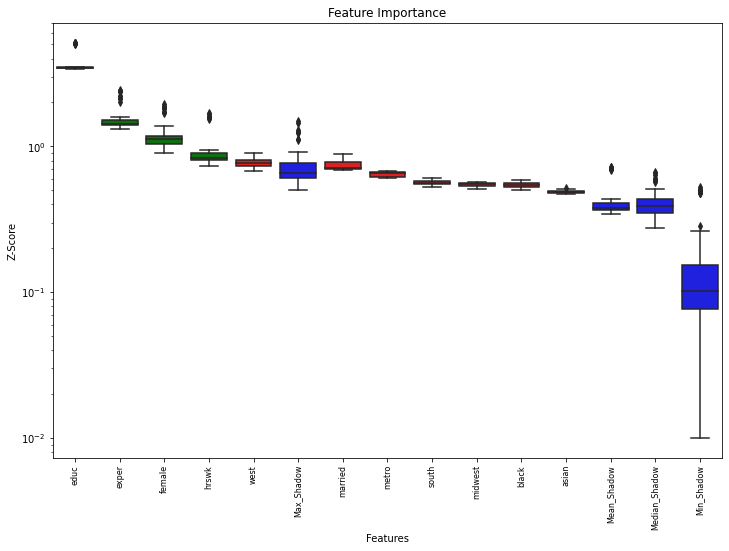

In [4]:
# 10 minutes to run for n_trial=50 
# if model is not specified in BroutaShap(): default = random forest (just like R and BorutaPy)
Feature_Selector = BorutaShap(importance_measure='shap', classification=False)
Feature_Selector.fit(X=x, y=y, n_trials=50, random_state=0)
Feature_Selector.plot(which_features='all')

In [5]:
# Returns a subset of the original data with the selected features
Feature_Selector.Subset()

,exper,educ,hrswk,female
0,39,16,37,1
1,16,12,62,0
2,13,16,40,0
3,11,14,40,1
4,51,12,40,0
...,...,...,...,...
995,27,16,40,1
996,7,13,40,1
997,5,14,40,1
998,36,8,40,1
